# Group 1

- Ricardo Lopes
- Marco Ramos
- Susana Fernandes

In [10]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import confusion_matrix

# Data

In [2]:
# We import data for training and testing separately
train_set = torchvision.datasets.FashionMNIST(root="./", download=True,
                                              train=True,
                                              transform=transforms.Compose([transforms.ToTensor()]))

test_set = torchvision.datasets.FashionMNIST(root="./", download=True, 
                                              train=False,
                                              transform=transforms.Compose([transforms.ToTensor()]))

To facilitate the manipulation of the data, we create a **data loader**: an object that is used to get batches of data from the dataset during training. 

In [3]:
data_loader = torch.utils.data.DataLoader(train_set, batch_size=10, shuffle=True)

Let's visualize some of the samples in our dataset.

Image tensor: torch.Size([10, 1, 28, 28])
class labels: tensor([2, 9, 8, 2, 3, 9, 4, 1, 9, 6])


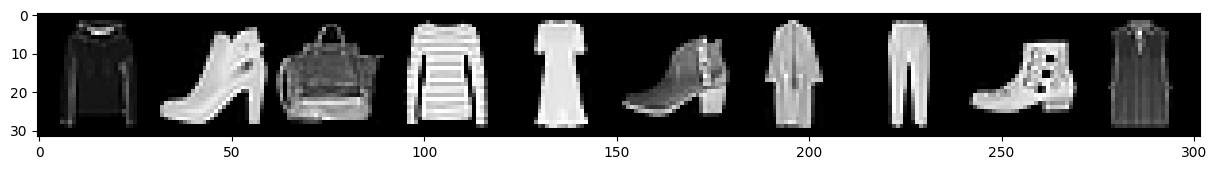

In [6]:
# Import plotting utilities
import matplotlib.pyplot as plt

# Get a sample from our dataloader. 
# The sample consists of a batch of images and corresponding labels.
images, labels = next(iter(data_loader))

# To plot the sample, we create a grid
plt.figure(figsize=(15, 10))
grid = torchvision.utils.make_grid(nrow=20, tensor=images)
print('Image tensor:', images.shape)
print('class labels:', labels)

# Plot the samples
plt.imshow(np.transpose(grid, axes=(1,2,0)), cmap='gray')

In [13]:
LABELS = ('T-shirt', 'Trousers', 'Pull-over', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boot')

# Activities

## Verify the impact of L2 regularization in the performance of the network. To that purpose, repeat the training of the network, but add to the SGD parameters the option `weight_decay=0.1`.

What is the weight_decay parameter?
- The weight_decay parameter adds a L2 penalty to the cost which can effectively lead to to smaller model weights.  
- L2 regularization is also referred to as weight decay.  
- The reason for this name is that thinking about SGD and backpropagation, the negative gradient of the L2 regularization term with respect to a parameter w_i is – 2 * lambda * w_i, where lambda is the aforementioned hyperparameter, simply named weight decay in PyTorch.

In [7]:
import torch.nn as nn

# We create a new class "FeedForwardNetwork" from nn.Module
class FeedForwardNetwork(nn.Module):
    def __init__(self):
        # Call the super class constructor
        super().__init__()

        # Our network will have a single hidden layer with 100 units
        self.layers = nn.Sequential(
            nn.Flatten(),        # Convert 28 x 28 images into a flat tensor
            nn.Linear(784, 100), # 28 x 28 = 784 inputs; 100 outputs
            nn.ReLU(),           # Add ReLU activation
            nn.Linear(100, 10)   # 100 inputs; 10 outputs (10 classes)
        )

    def forward(self, x): # implements the forward method (flow of tensors)
        # Given input x, we just run x through the layers in the network
        out = self.layers(x)
        return out
    
# Create an instance of the network
net = FeedForwardNetwork()

loss = nn.CrossEntropyLoss()

EPOCHS = 20

# Define the optimizer. We indicate:
#   - What is being optimized (the parameters of the network)
#   - The learning rate 
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, weight_decay=0.1)

# Reset data loader
iter(data_loader)

for ep in range(EPOCHS):
    print('Training epoch:', ep)

    # Keep track of the loss during training
    train_loss = []

    # We use our data loader to fetch batches from our dataset
    for Xbatch, ybatch in data_loader:

        # We first zero-out the gradients
        optimizer.zero_grad()

        # Compute output
        output = net(Xbatch)

        # Get loss
        l = loss(output, ybatch)

        # Compute gradients
        l.backward()

        # Perform optimization step
        optimizer.step()

        train_loss.append(l)

    print('Training loss: %.4f' % torch.tensor(train_loss).mean().item())

Training epoch: 0
Training loss: 1.5133
Training epoch: 1
Training loss: 1.0318
Training epoch: 2
Training loss: 0.9722
Training epoch: 3
Training loss: 0.9557
Training epoch: 4
Training loss: 0.9493
Training epoch: 5
Training loss: 0.9459
Training epoch: 6
Training loss: 0.9441
Training epoch: 7
Training loss: 0.9426
Training epoch: 8
Training loss: 0.9407
Training epoch: 9
Training loss: 0.9410
Training epoch: 10
Training loss: 0.9392
Training epoch: 11
Training loss: 0.9393
Training epoch: 12
Training loss: 0.9385
Training epoch: 13
Training loss: 0.9374
Training epoch: 14
Training loss: 0.9380
Training epoch: 15
Training loss: 0.9373
Training epoch: 16
Training loss: 0.9363
Training epoch: 17
Training loss: 0.9369
Training epoch: 18
Training loss: 0.9358
Training epoch: 19
Training loss: 0.9362


In [8]:
@torch.no_grad()
def get_predictions(network, dataset):

    # Create dataloader from dataset
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=10000)

    # Create a tensor to store results
    predictions = torch.tensor([])
    for Xbatch, _ in dataloader:
        # Get predictions
        output = network(Xbatch)

        # Add them to the tensor
        predictions = torch.cat((predictions, output), dim=0)
        
    return predictions

In [11]:
predictions = get_predictions(net, train_set)
cm_train = confusion_matrix(y_true=train_set.targets, y_pred=predictions.argmax(1))

print('\n= Confusion matrix in training =')
print(cm_train)

print('\nTraining accuracy:', cm_train.trace() / predictions.shape[0])

# We compute the confusion matrix for the test set
predictions = get_predictions(net, test_set)
cm_test = confusion_matrix(y_true=test_set.targets, y_pred=predictions.argmax(1))

print('\n= Confusion matrix in test =')
print(cm_test)

print('\nTest accuracy:', cm_test.trace() / predictions.shape[0])


= Confusion matrix in training =
[[4756   84   81  651   35    1  262    1  127    2]
 [  25 5586  126  220   30    0   11    0    2    0]
 [  76   18 3851   56 1468    1  407    1  121    1]
 [ 290  118   28 5149  157    0  240    0   17    1]
 [   8   65 1136  548 4036    1  147    0   58    1]
 [   6    1    7    8    2 1712    0 2501  106 1657]
 [1347   38 1370  364 1850    1  779    2  247    2]
 [   0    0    0    0    0   18    0 5373   10  599]
 [  19    5   72  118   35    3   97   83 5554   14]
 [   2    4    1    4    0    5    1  400    4 5579]]

Training accuracy: 0.70625

= Confusion matrix in test =
[[781   8  12 110   9   1  54   0  25   0]
 [  5 919  16  46  12   0   0   0   2   0]
 [ 15   3 616  13 250   0  82   0  20   1]
 [ 48  17   6 838  28   0  59   0   4   0]
 [  0  11 238  71 641   0  30   0   9   0]
 [  1   1   0   2   0 265   0 410  20 301]
 [226   4 213  80 308   0 123   0  46   0]
 [  0   0   0   0   0   6   0 894   0 100]
 [  3   2  15  21   1   0  14  12

## Verify the impact of dropout in the performance of the network. To that purpose, repeat the training of the network, but add a dropout layer after the ReLU in the network definition. You can do it by adding the line `nn.Dropout(0.3),` (the number is the dropout probability).

In [12]:
import torch.nn as nn

# We create a new class "FeedForwardNetwork" from nn.Module
class FeedForwardNetwork(nn.Module):
    def __init__(self):
        # Call the super class constructor
        super().__init__()

        # Our network will have a single hidden layer with 100 units
        self.layers = nn.Sequential(
            nn.Flatten(),        # Convert 28 x 28 images into a flat tensor
            nn.Linear(784, 100), # 28 x 28 = 784 inputs; 100 outputs
            nn.ReLU(),           # Add ReLU activation
            nn.Dropout(0.3),
            nn.Linear(100, 10)   # 100 inputs; 10 outputs (10 classes)
        )

    def forward(self, x): # implements the forward method (flow of tensors)
        # Given input x, we just run x through the layers in the network
        out = self.layers(x)
        return out
    
# Create an instance of the network
net = FeedForwardNetwork()

loss = nn.CrossEntropyLoss()

EPOCHS = 20

# Define the optimizer. We indicate:
#   - What is being optimized (the parameters of the network)
#   - The learning rate 
optimizer = torch.optim.SGD(net.parameters(), lr=0.001)

# Reset data loader
iter(data_loader)

for ep in range(EPOCHS):
    print('Training epoch:', ep)

    # Keep track of the loss during training
    train_loss = []

    # We use our data loader to fetch batches from our dataset
    for Xbatch, ybatch in data_loader:

        # We first zero-out the gradients
        optimizer.zero_grad()

        # Compute output
        output = net(Xbatch)

        # Get loss
        l = loss(output, ybatch)

        # Compute gradients
        l.backward()

        # Perform optimization step
        optimizer.step()

        train_loss.append(l)

    print('Training loss: %.4f' % torch.tensor(train_loss).mean().item())

Training epoch: 0
Training loss: 1.3888
Training epoch: 1
Training loss: 0.8533
Training epoch: 2
Training loss: 0.7343
Training epoch: 3
Training loss: 0.6648
Training epoch: 4
Training loss: 0.6213
Training epoch: 5
Training loss: 0.5905
Training epoch: 6
Training loss: 0.5652
Training epoch: 7
Training loss: 0.5440
Training epoch: 8
Training loss: 0.5296
Training epoch: 9
Training loss: 0.5162
Training epoch: 10
Training loss: 0.5052
Training epoch: 11
Training loss: 0.4925
Training epoch: 12
Training loss: 0.4852
Training epoch: 13
Training loss: 0.4756
Training epoch: 14
Training loss: 0.4699
Training epoch: 15
Training loss: 0.4623
Training epoch: 16
Training loss: 0.4550
Training epoch: 17
Training loss: 0.4507
Training epoch: 18
Training loss: 0.4444
Training epoch: 19
Training loss: 0.4413


In [13]:
@torch.no_grad()
def get_predictions(network, dataset):

    # Create dataloader from dataset
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=10000)

    # Create a tensor to store results
    predictions = torch.tensor([])
    for Xbatch, _ in dataloader:
        # Get predictions
        output = network(Xbatch)

        # Add them to the tensor
        predictions = torch.cat((predictions, output), dim=0)
        
    return predictions

In [14]:
predictions = get_predictions(net, train_set)
cm_train = confusion_matrix(y_true=train_set.targets, y_pred=predictions.argmax(1))

print('\n= Confusion matrix in training =')
print(cm_train)

print('\nTraining accuracy:', cm_train.trace() / predictions.shape[0])

# We compute the confusion matrix for the test set
predictions = get_predictions(net, test_set)
cm_test = confusion_matrix(y_true=test_set.targets, y_pred=predictions.argmax(1))

print('\n= Confusion matrix in test =')
print(cm_test)

print('\nTest accuracy:', cm_test.trace() / predictions.shape[0])


= Confusion matrix in training =
[[4897   37   84  268   24    7  603    1   77    2]
 [  11 5745   46  156   17    1   22    0    2    0]
 [  69   10 4431   48  877    7  489    1   67    1]
 [ 271   71   55 5108  269    3  195    0   27    1]
 [  11    9  430  162 4891    2  456    0   38    1]
 [   6    1    1    3    0 5515    1  252   38  183]
 [ 830   15  618  156  678    5 3589    1  107    1]
 [   0    0    0    0    0  260    0 5326   17  397]
 [  31    4   34   42   32   43  102   30 5679    3]
 [   0    1    1    0    0   86    2  172    8 5730]]

Training accuracy: 0.8485166666666667

= Confusion matrix in test =
[[788   2  14  47   7   2 123   0  17   0]
 [  3 944   7  35   7   0   2   0   2   0]
 [ 18   5 714   8 158   2  82   0  13   0]
 [ 28  14   9 847  38   1  57   0   6   0]
 [  0   2  94  26 788   1  80   0   9   0]
 [  1   0   0   1   0 907   0  45   3  43]
 [128   2 113  35 100   2 586   0  34   0]
 [  0   0   0   0   0  40   0 887   0  73]
 [  4   1  12  10   4 

## From your results, do you believe that the original model is overfitting?

No, I dont think the original model is overfitting.

Firstly, in the original model the accuracy of the training (0.85865) and test (0.8421) dataset are similar.

Secondly, when testing with two forms of regularization, L2 and dropout, thus simplyfing the model, the accuracy either decreased in the case of the L2 or maintained in the case of dropout. The diference between the training and test dataset stayed similar between all the tests.
If the model was previously overfitted then with the regularization the accuracy could increase.